In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("training/0/Training_3908.jpg")

In [3]:
img_array.shape   #rgb

(48, 48, 3)

In [4]:
img_array

array([[[163, 163, 163],
        [128, 128, 128],
        [114, 114, 114],
        ...,
        [139, 139, 139],
        [141, 141, 141],
        [134, 134, 134]],

       [[147, 147, 147],
        [114, 114, 114],
        [102, 102, 102],
        ...,
        [142, 142, 142],
        [138, 138, 138],
        [138, 138, 138]],

       [[112, 112, 112],
        [106, 106, 106],
        [ 92,  92,  92],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [134, 134, 134]],

       ...,

       [[139, 139, 139],
        [141, 141, 141],
        [136, 136, 136],
        ...,
        [154, 154, 154],
        [171, 171, 171],
        [191, 191, 191]],

       [[140, 140, 140],
        [133, 133, 133],
        [120, 120, 120],
        ...,
        [138, 138, 138],
        [146, 146, 146],
        [158, 158, 158]],

       [[136, 136, 136],
        [134, 134, 134],
        [113, 113, 113],
        ...,
        [146, 146, 146],
        [144, 144, 144],
        [144, 144, 144]]

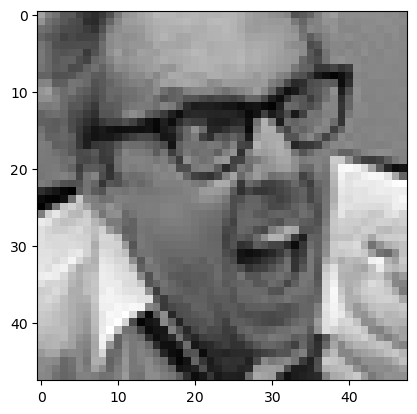

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "training/"

In [7]:
Classes = ["0","1","2","3","4","5","6"] #list of classess => exact name of folders

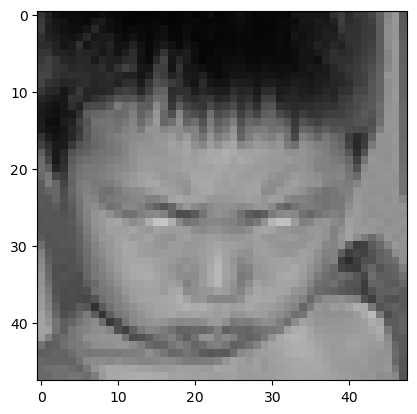

In [8]:
for category in Classes:
    path=os.path.join(Datadirectory, category) #//
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGV)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

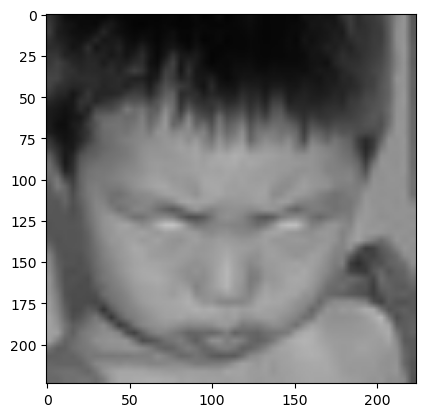

In [9]:
img_size= 224 ## ImageNet => 224 x 224
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show() #changing because we do transfer learning

In [10]:
new_array.shape

(224, 224, 3)

### read all the images and convert them to array

In [11]:
training_Data = [] ##data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass
                

In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

28709


In [14]:
temp = np.array(training_Data)
temp.shape

C:\Users\Gowtham Anandaraj\AppData\Local\Temp\ipykernel_2204\115100705.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


(28709, 2)

## we are just training and deploying for realtime cam demo

In [15]:
import random

random.shuffle(training_Data) #should not learn the sequence so DL will be robust

In [16]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)
    

X = np.array(X).reshape(-1, img_size, img_size, 3) #converting into 4 dimensions 

In [17]:
X.shape

(28709, 224, 224, 3)

In [18]:
#normalize the data
#X = X/255.0 #we are normalizing it 

In [19]:
Y = np.array(y)
Y.shape

(28709,)

## Deep Learning model for training - Tranfer Learning

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = tf.keras.applications.MobileNetV2() #pre-trained model

In [22]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

## Tranfer Learning - Tuning, weights will start from last check pt

In [23]:
base_input = model.layers[0].input

In [24]:
base_output = model.layers[-2].output

In [25]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [26]:
final_output = layers.Dense(128)(base_output) #adding new layer after the output of pooling layer
final_ouput = layers.Activation('relu')(final_output)  #activation function
final_output = layers.Dense(64)(final_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [31]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [32]:
new_model.save('mod_my_model_94p69.h5')

In [ ]:
new_model.fit(X,Y, epochs = 25)

Epoch 1/25
  4/898 [..............................] - ETA: 38:28 - loss: 1.8499 - accuracy: 0.0938

In [33]:
new_model.save('mod_my_model2_94p69.h5')

In [34]:
new_model = tf.keras.models.load_model('mod_my_model_94p69.h5')

In [35]:
frame = cv2.imread("surprise.jpg")

In [36]:
frame.shape

(168, 300, 3)

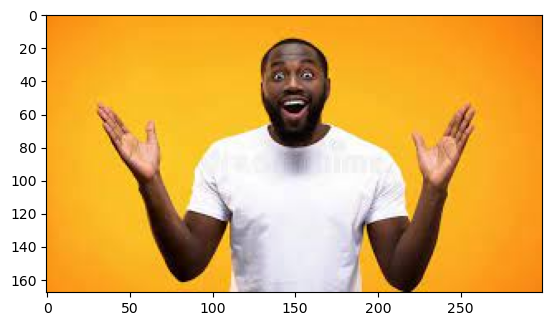

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [38]:
# face detection algorithm

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(168, 300)

In [42]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh,ex:ex+ew]
            

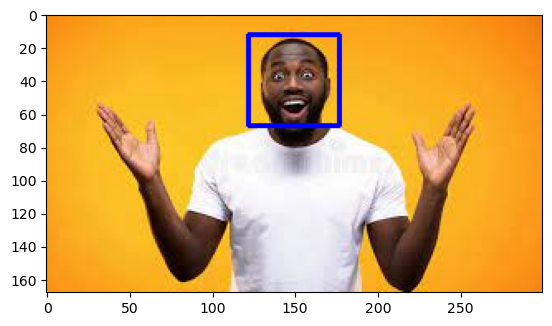

In [43]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [44]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [45]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 949ms/step


In [46]:
Predictions[0]

array([0.07787869, 0.02763674, 0.06059053, 0.6783961 , 0.07788458,
       0.05169569, 0.02591763], dtype=float32)

In [47]:
np.argmax(Predictions)

3

## Realtime Detection 

In [49]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle bg to white
rectangle_bgr = (255,255,255)
#make a black image
img = np.zeros((500,500))
#set some text
text = "some text in a box"
#get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the coords of box with a small padding of the pixel
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[1], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,255), thickness=1)

cap = cv2.VideoCapture(1)
#check if webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                 face_roi = roi_color[ey: ey+eh,ex:ex+ew]

    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(predictions)==0):
        status = "Angry"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif (np.argmax(predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif (np.argmax(predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif (np.argmax(predictions)==5):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(predictions)==6):
        status = "Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        status="Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10), y1 +int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    

    cv2.imshow('RealTime Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 84ms/step
Face not detected
1/1 [==============================] - 0s 83ms/step
Face not detected
1/1 [==============================] - 0s 65ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================]

1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Fa

1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/

1/1 [==============================] - 0s 45ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
Face not detected
1/1 [==============================]

1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/

1/1 [==============================] - 0s 47ms/step
